# CISC 856: Reinforcement Learning
## Assignment 1: 2-Player Matrix Games
##### Hugh Morison (10179903)
##### Matthew Filipovich (20029031)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from policy_iteration import p1_rewards, p2_rewards, action_labels, games, normalize, play_game, update_policy, iterate, make_plots, make_trajectory_plots, statistics
%matplotlib inline

# a)

## Prisoner's Dilemma

In [2]:
rewards_1 = p1_rewards[0]
rewards_2 = p2_rewards[0]
labels = action_labels[0]
N = 10000

### Initialize with random policies (alpha = 0.05):

Converged to probabilities of lying:
	Player 1:2.6617738462976265e-23
	Player 2:2.220416774661738e-23

Converged to probabilities of confessing:
	Player 1:1.0
	Player 2:1.0



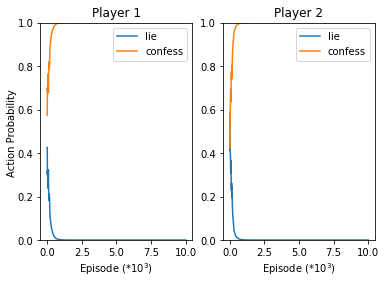

In [3]:
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))
p1_history, p2_history, _, _ = iterate(policy_1, rewards_1, policy_2, rewards_2, max_iterations=N)
statistics(p1_history, p2_history, labels)

### Initialize with both players tending to lie (alpha = 0.05):

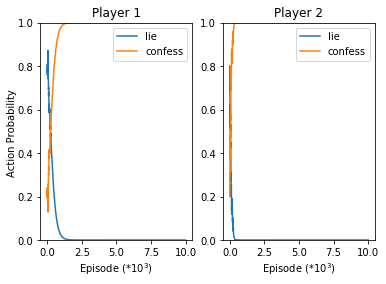

In [4]:
policy_1 = np.array([0.8, 0.2])
policy_2 = np.array([0.8, 0.2])
p1_history, p2_history, _, _ = iterate(policy_1, rewards_1, policy_2, rewards_2, max_iterations=N)
make_plots(p1_history, p2_history, labels)

### Initialize with one hardened criminal (Player 1) and one rookie (Player 2) (alpha = 0.05):

Converged to probabilities of lying:
	Player 1:5.114919505224253e-22
	Player 2:1.0011889466553934e-26

Converged to probabilities of confessing:
	Player 1:1.0
	Player 2:1.0



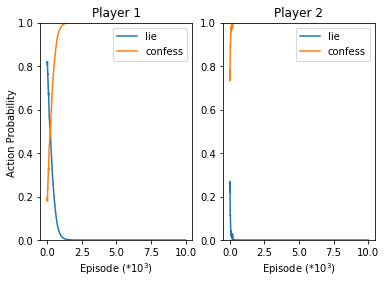

In [5]:
policy_1 = np.array([0.8, 0.2])
policy_2 = np.array([0.2, 0.8])
p1_history, p2_history, _, _ = iterate(policy_1, rewards_1, policy_2, rewards_2, max_iterations=N)
statistics(p1_history, p2_history, labels)

## Matching Pennies

In [6]:
rewards_1 = p1_rewards[1]
rewards_2 = p2_rewards[1]
labels = action_labels[1]
N = 50000 # Number of episodes

### Initialize with random policies (alpha = 0.001):

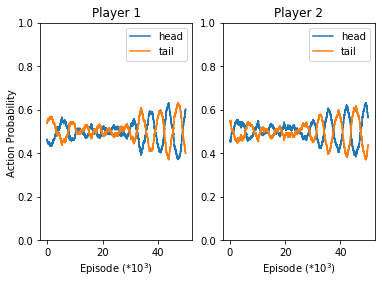

In [7]:
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))
p1_history, p2_history, _, _ = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.001, max_iterations=N)
make_plots(p1_history, p2_history, labels)

### Initialize with both 90% head, 10% tail (alpha = 0.001):

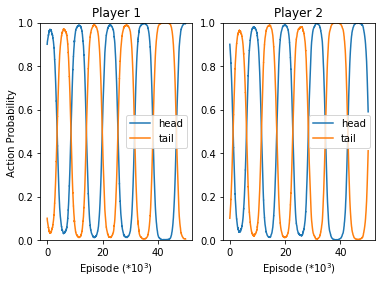

In [8]:
policy_1 = np.array([0.9, 0.1])
policy_2 = np.array([0.9, 0.1])
p1_history, p2_history, _, _ = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.001, max_iterations=N)
make_plots(p1_history, p2_history, labels)

## Rock Paper Scissors

In [9]:
rewards_1 = p1_rewards[2]
rewards_2 = p2_rewards[2]
labels = action_labels[2]
N = 50000 # Number of episodes

### Initialize with random policies (alpha = 0.001):

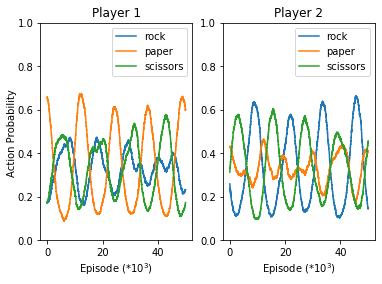

In [10]:
policy_1 = normalize(np.random.random(3))
policy_2 = normalize(np.random.random(3))
p1_history, p2_history, _, _ = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.001, max_iterations=N)
make_plots(p1_history, p2_history, labels)

### Initialize both players 80%, 10%, 10% policies (alpha = 0.001):

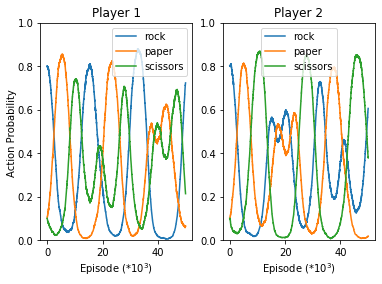

In [11]:
policy_1 = np.array([0.8, 0.1, 0.1])
policy_2 = np.array([0.8, 0.1, 0.1])
p1_history, p2_history, _, _ = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.001, max_iterations=N)
make_plots(p1_history, p2_history, labels)

### Initialize player 1 10%, 80%, 10% and Player 2 10%, 10%, 80% policies (alpha = 0.001):

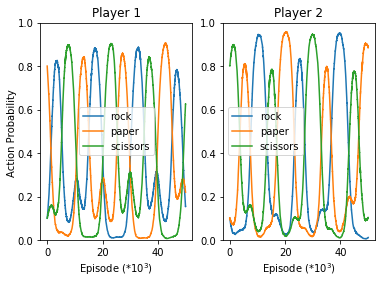

In [12]:
policy_1 = np.array([0.1, 0.8, 0.1])
policy_2 = np.array([0.1, 0.1, 0.8])
p1_history, p2_history, _, _ = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.001, max_iterations=N)
make_plots(p1_history, p2_history, labels)

In [13]:

'Modified Algorithm'
# random policies
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.0005, max_iterations=N, update_alg='modified')

make_plots(p1_history, p2_history, labels)

ValueError: 'a' and 'p' must have same size

## Rock Paper Scissors

In [ ]:
rewards_1 = p1_rewards[2]
rewards_2 = p2_rewards[2]
labels = action_labels[2]
N = 50000

'First Algorithm'
# random policies
policy_1 = normalize(np.random.random(3))
policy_2 = normalize(np.random.random(3))

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.01, max_iterations=N)

p_rock1, p_paper1, p_scissors1 = zip(*p1_history)
p_rock2, p_paper2, p_scissors2 = zip(*p2_history)

make_plots(p1_history, p2_history, labels)
make_trajectory_plots(p1_history, p2_history, labels)

'Modified Algorithm'
# random policies
policy_1 = normalize(np.random.random(3))
policy_2 = normalize(np.random.random(3))

p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.01, max_iterations=N, update_alg='modified')

p_rock1, p_paper1, p_scissors1 = zip(*p1_history)
p_rock2, p_paper2, p_scissors2 = zip(*p2_history)

make_plots(p1_history, p2_history, labels)
make_trajectory_plots(p1_history, p2_history, labels)


# All Three Games

In [ ]:
N = 500000
for game in range(3):
    rewards_1 = p1_rewards[game]
    rewards_2 = p2_rewards[game]
    labels = action_labels[game]
    size = len(labels)
    
    #random starting policies
    print('STANDARD ALGORITHM')
    policy_1 = normalize(np.random.random(size))
    policy_2 = normalize(np.random.random(size))
    p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.0005, max_iterations=N)
    make_plots(p1_history, p2_history, labels)
    
    #random starting policies
    print('MODIFIED ALGORITHM')
    policy_1 = normalize(np.random.random(size))
    policy_2 = normalize(np.random.random(size))
    p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=0.0005, max_iterations=N, update_alg='modified')
    make_plots(p1_history, p2_history, labels)